In [1]:
# System imports
import os
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import hvplot.pandas
import panel as pn
from pathlib import Path
from dotenv import load_dotenv
from panel.interact import interact
from panel import widgets
from string import digits
import csv
import json
import numpy as np
import dateparser
import panel as pn

pn.extension()

%matplotlib inline

In [2]:
# Local imports
import sys
sys.path.append("../lib2")

from Constants import Constants
from ProcessingTools import DateProcessingTools

In [3]:
# Construct the tools
debug_level = 0
constants = Constants()
tool_data_processing = DateProcessingTools(debug_level)


In [4]:
# Import all preprocessed data
atlas           = pd.read_pickle(constants.PREPROCESSED_ATLAS_FILE_PATH)
forecast        = pd.read_pickle(constants.PREPROCESSED_FORECAST_DATA_FILE_PATH)
revenue2020     = pd.read_pickle(constants.PREPROCESSED_REVENUE2020_FILE_PATH)
revenue2020A    = pd.read_pickle(constants.PREPROCESSED_REVENUE2020A_FILE_PATH)
atlas2          = pd.read_pickle(constants.PREPROCESSED_ATLAS_2_FILE_PATH)


In [5]:
atlas.head()

Invoice Date  Invoice #  Invoice Amount  \
Customers                                                           
University 1 2015-03-20 00:00:00-04:00  ATLAS 315         72000.0   
University 2 2015-05-28 00:00:00-04:00      AJ501          3500.0   
University 3 2015-06-23 00:00:00-04:00      AJ502          3500.0   
University 4 2015-06-26 00:00:00-04:00      AJ503          6500.0   
University 5 2015-10-07 00:00:00-04:00      AJ504           750.0   

             Subscription            Account Code              Service Start  \
Customers                                                                      
University 1       1 Year  4700-0-00-00000-18-0000 2015-03-18 00:00:00-04:00   
University 2       1 Year  4700-0-00-00000-16-0000 2015-06-01 00:00:00-04:00   
University 3       1 Year  4700-0-00-00000-17-0000 2015-06-10 00:00:00-04:00   
University 4       1 Year  4700-0-00-00000-32-0000 2015-06-01 00:00:00-04:00   
University 5       1 Year  4700-0-00-00000-20-0000 2015-10-05 00:00:00-04:00   

                           Service End Subscription Duration  
Customers                                                     
University 1 2016-06-30 00:00:00-04:00              365 days  
University 2 2016-06-30 00:00:00-04:00              365 days  
University 3 2016-06-30 00:00:00-04:00              365 days  
University 4 2016-06-30 00:00:00-04:00              365 days  
University 5 2016-09-30 00:00:00-04:00              365 days

In [6]:
(atlas["Invoice Date"] - atlas["Service Start"]).apply(lambda date: date.days)

Customers
University 1       2.0
University 2      -4.0
University 3      13.0
University 4      25.0
University 5       2.0
                  ... 
University 358    74.0
University 278    94.0
University 452    16.0
University 143   -57.0
University 453     1.0
Length: 669, dtype: float64

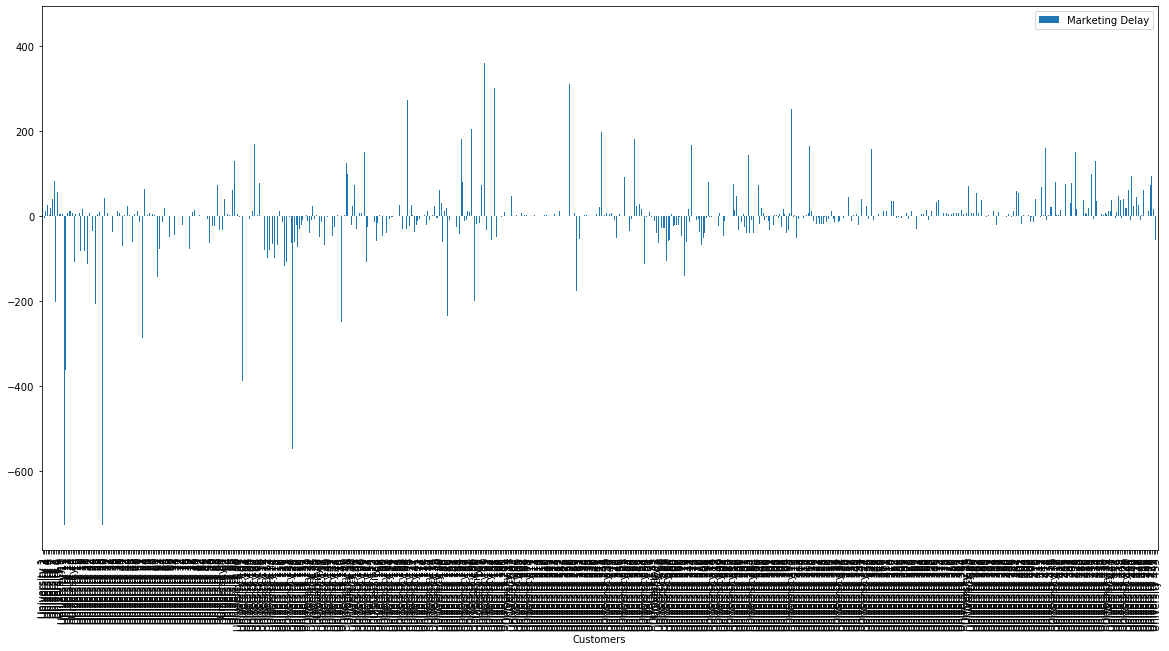

In [7]:
# Plot delays between marketing initiation and payment date (NOTE: This is sample data and not accurate until relevant data is available.)
marketing_delay = atlas["Invoice Date"] - atlas["Service Start"]
marketing_delay_days = marketing_delay.apply(lambda date: date.days)
marketing_delay_df = pd.DataFrame(marketing_delay_days, columns=["Marketing Delay"])
marketing_delay_df.plot.bar(figsize=(20, 10))

# TODO Group by customer regardless and Group by subscription length.
# TODO Response time for each state
# TODO Response time for each type of customer ("ATLAS Customer Type")
# TODO Response time for each type of customer ("Organization Record Type")
# TODO Data on potential customers and %success


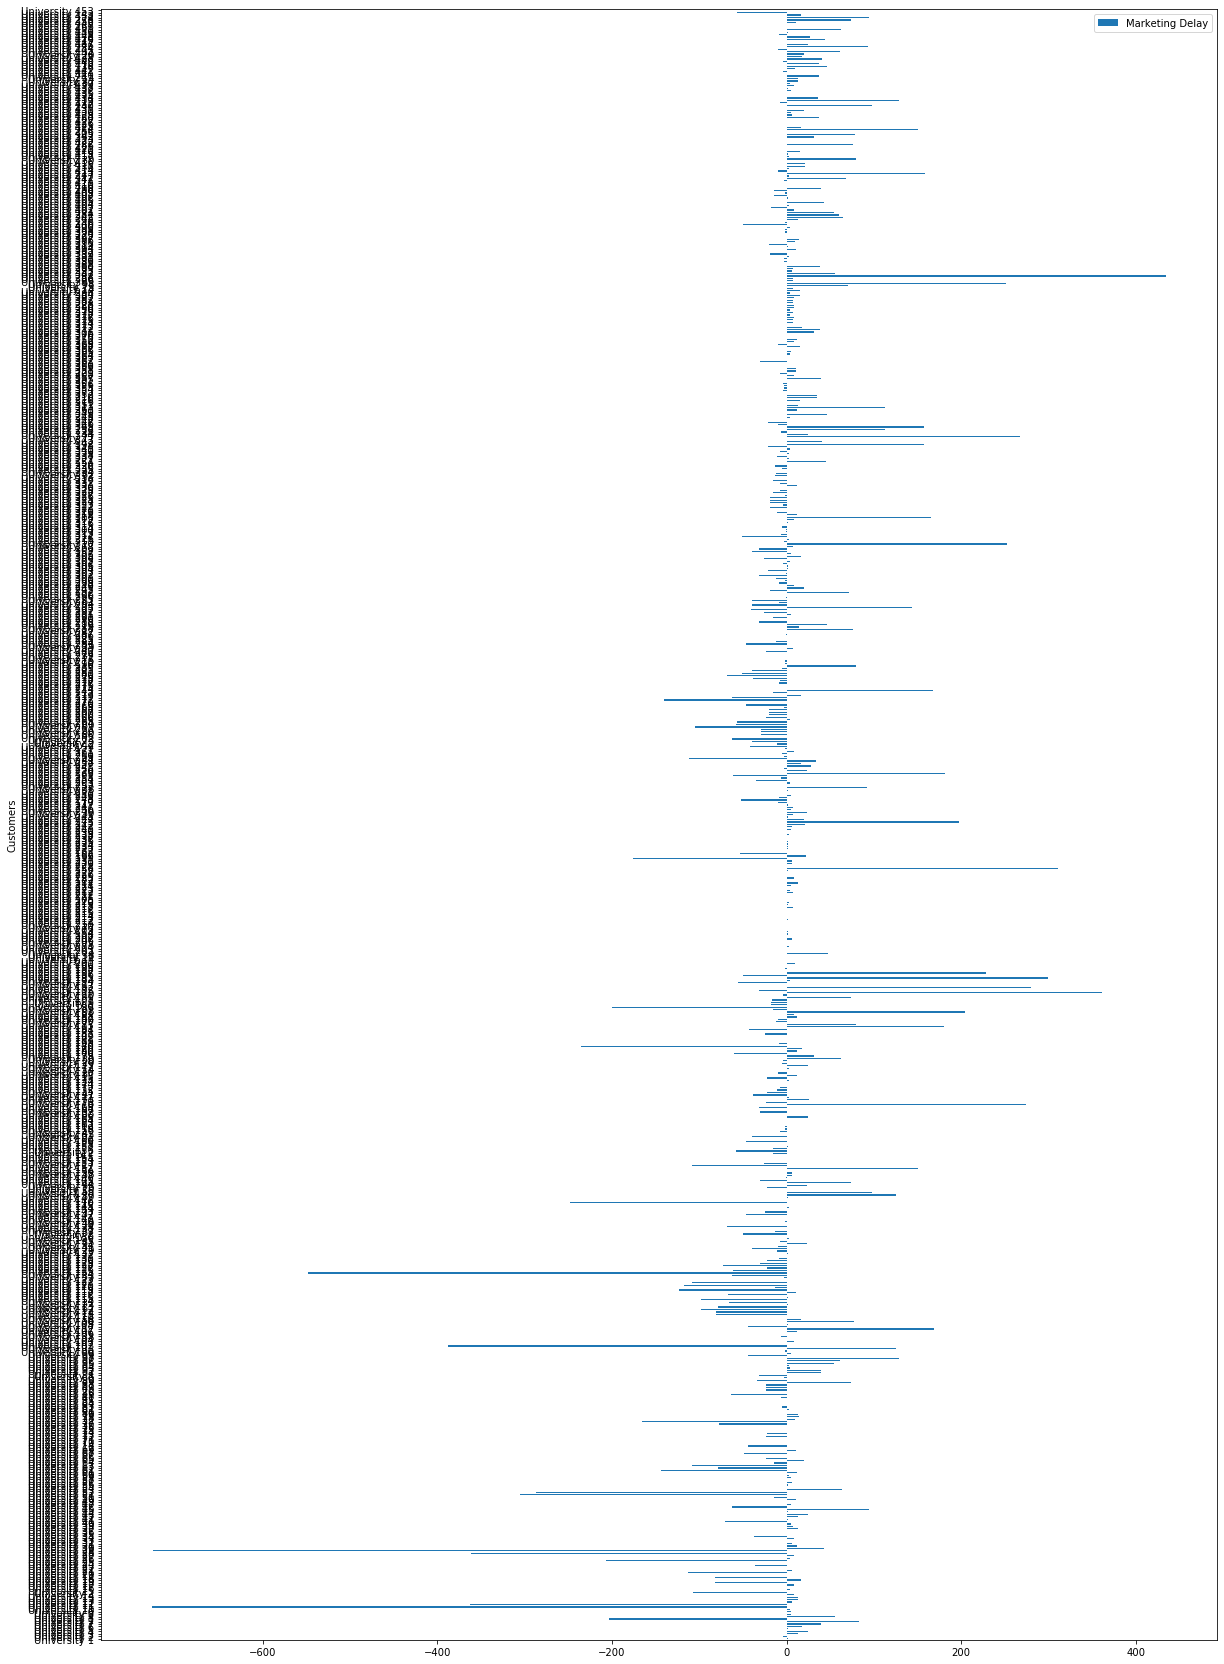

In [8]:
marketing_delay_df.plot.barh(figsize=(20, 30))

In [9]:
# Basic info
total_invoiced_per_customer = atlas.groupby(["Customers"]).sum()
total_invoiced_per_customer.head()

Invoice Amount
Customers                     
University 1         139000.00
University 10          6866.67
University 100         1500.00
University 101         2500.00
University 102         1500.00

In [10]:
atlas.head(1)

Invoice Date  Invoice #  Invoice Amount  \
Customers                                                           
University 1 2015-03-20 00:00:00-04:00  ATLAS 315         72000.0   

             Subscription            Account Code              Service Start  \
Customers                                                                      
University 1       1 Year  4700-0-00-00000-18-0000 2015-03-18 00:00:00-04:00   

                           Service End Subscription Duration  
Customers                                                     
University 1 2016-06-30 00:00:00-04:00              365 days

In [11]:
def fcn(df):
    print(f"Size of df: {df.size}")
    # dfs = df["Subscription"]
    # print(f"Contents of of df[Subscription]: {dfs}")
    # print(f"Contents of of df: {df}")

    customer_subscriptions_ordered_by_date = df.loc[:, ["Subscription", "Service Start"]].sort_values("Service Start")
    # subscriptions = df#.reset_index().loc[["Subscription", "Service Start"]]
    # subscriptions = df["Subscription"].values
    print(customer_subscriptions_ordered_by_date)

    print(customer_subscriptions_ordered_by_date)

    # TODO fcn to compute upgrade, downgrade, and delays between them.

    return df


# Calculate conversion rates across various subscription combinations
repeat_customers = atlas.index.duplicated()
print(f"There are {repeat_customers.sum()} universities in this dataset who purchased 2 or more subscriptions.")
# atlas.loc[repeat_customers].groupby("Customers").apply(lambda x: x["Subscription"])
# atlas.loc[repeat_customers].groupby("Customers").apply(lambda x: x["Subscription"])
atlas.loc[repeat_customers].groupby("Customers").apply(fcn)

# TODO Reduce #groups by also grouping by location, type of customer etc.

# TODO Add a category and grouping everywhere based on total or trailing invoice value (0-100k, 100k-1M, etc)

# TODO: Tag the following:
# - Drop-off in subscription length
# - Drop-off in subscription coverage
# - Upgrades with coverage gaps
# - Upgrades with no coverage gaps
# - Any coverage gaps

# TODO Find late payers past threshold

       Subscription             Service Start
Customers                                            
University 288       1 Year 2019-07-01 00:00:00-04:00
               Subscription             Service Start
Customers                                            
University 288       1 Year 2019-07-01 00:00:00-04:00
Size of df: 8
               Subscription             Service Start
Customers                                            
University 290       1 Year 2020-08-01 00:00:00-04:00
               Subscription             Service Start
Customers                                            
University 290       1 Year 2020-08-01 00:00:00-04:00
Size of df: 8
               Subscription             Service Start
Customers                                            
University 291     6 Months 2020-08-16 00:00:00-04:00
               Subscription             Service Start
Customers                                            
University 291     6 Months 2020-08-16 00:00:00-04:00
Size of 

ValueError: cannot reindex from a duplicate axis

In [ ]:
# atlas.columns
atlas.loc[:, ["Subscription", "Service Start"]]
atlas.loc[:, ["Subscription", "Service Start"]].sort_values("Service Start")